In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
X_train = pd.read_csv('Xtr.csv', header = None)
X_test  = pd.read_csv('Xte.csv')
y_train = pd.read_csv('Ytr.csv')

In [9]:
print X_train.shape, X_test.shape, y_train.shape

(5000, 784) (9999, 784) (5000, 2)


In [55]:
def plot_faces(faces, n_rows=4, n_cols=8, label=False):
    plt.figure(figsize=(14, 10))
    face_shape = (28,28)
    for k, flat_face in enumerate(faces):
        if k >= n_rows * n_cols:
            break
        #print flat_face.shape
        face = flat_face.reshape(face_shape).T
        plt.subplot(n_rows, n_cols, k+1)
        plt.imshow(face, cmap=plt.cm.gray, interpolation='none')
        plt.xticks(())
        plt.yticks(())
        if label:
            plt.title(y_train['Prediction'][k], size=10)
    plt.show()

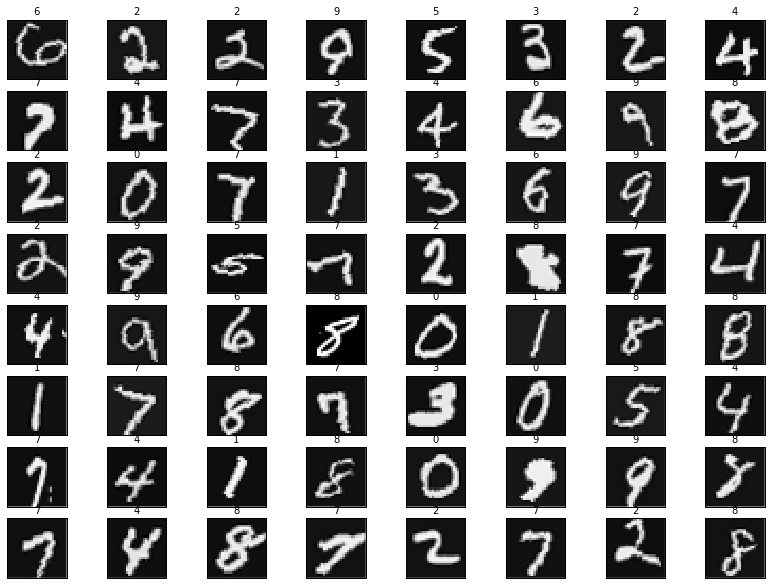

In [56]:
plot_faces(np.array(X_train), 8,8, True)

In [64]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [73]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(SVC(), parameters, cv = 5)

In [74]:
clf.fit(X_train, y_train['Prediction'])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [75]:
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.833 (+/-0.025) for {'kernel': 'linear', 'C': 1}
0.845 (+/-0.031) for {'kernel': 'rbf', 'C': 1}
0.832 (+/-0.024) for {'kernel': 'linear', 'C': 10}
0.879 (+/-0.021) for {'kernel': 'rbf', 'C': 10}


In [76]:
cv_score.mean()

0.87961267042365898

In [108]:
def compute_hog(digits):
    hog_all = []
    for k, digit in enumerate(np.array(digits)):
        face_shape = (28,28)
        image = digit.reshape(face_shape).T

        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(2, 2),
                            cells_per_block=(2, 2), visualise=True)

        #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        #ax1.axis('off')
        #ax1.imshow(image, cmap=plt.cm.gray)
        #ax1.set_adjustable('box-forced')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
        hog_flat = hog_image_rescaled.reshape((784))
        hog_all.append(hog_flat)
        #ax2.axis('off')
        #ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        #ax2.set_title('Histogram of Oriented Gradients')
        #ax1.set_adjustable('box-forced')
        
    return np.array(hog_all)

In [109]:
hog_hist = compute_hog(X_train)

In [115]:
print hog_hist.shape

(1001L, 784L)
